<a href="https://colab.research.google.com/github/tuliofalmeida/bacteria/blob/main/notebooks/Tutorial_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial Analysis

For this tutorial we will use the dataframes available on the Library GitHub

Library documentation: [Bacteria GitHub](https://github.com/tuliofalmeida/bacteria)
Library documentation: [Bacteria docs](https://bacteria.readthedocs.io)

## Imports

In [1]:
#@title Let's clone the repository to this notebook to access the data 
!git clone https://github.com/tuliofalmeida/bacteria
from IPython.display import clear_output
for i in range(10):
    clear_output(wait=True)
    print("Github successfully cloned!")

Github successfully cloned!


In [2]:
#@title Pip install Bacteria
!pip install bacteria
!mkdir plots
for i in range(10):
    clear_output(wait=True)
    print("Bacteria successfully installed!")

Bacteria successfully installed!


In [3]:
import bacteria as bac
import pandas as pd
import matplotlib.pyplot as plt

Load the data

In [4]:
df2d = pd.read_csv('/content/bacteria/data_tutorial/df2d_filtered.csv')
df3d = pd.read_csv('/content/bacteria/data_tutorial/df3d_filtered.csv')

## Experiment in time

Calculating the instantaneous volume change (Growth Rate) and fluorescence.

Here, the underline after the comma is used to ignore the second output of the function, which in this case is a dictionary with other dictionaries inside with the raw data.

In [5]:
gr_df,_ = bac.derivative(df3d,column='Volume')
fluo_df,_ = bac.derivative(df3d,column='Fluor1 sum')

100%|██████████| 924/924 [01:27<00:00, 10.61it/s]


Calculating the average of all cells for different columns from derivative and 3D data

In [6]:
time_gr,mean_gr,ci_gr = bac.column_mean(gr_df,column='Derivative')
time_fluo,mean_fluo,ci_fluo = bac.column_mean(fluo_df,column='Derivative')
time_div,mean_div,ci_div = bac.column_mean(df3d,column='Long axis (L)')
time_ratio,mean_ratio,ci_ratio = bac.column_mean(df3d,column='F/V')

/usr/local/lib/python3.10/dist-packages/scipy/stats/_resampling.py:144: RuntimeWarning: invalid value encountered in double_scalars
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_resampling.py:97: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2093: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Rearranging 2D data based on division time to plot the data over time

In [7]:
df_2d_temp = pd.melt(df2d, id_vars=['Cell ID','Cell age','Area death','Time Division'], value_vars=['Vd-Vb']).sort_values(by=['Time Division'])

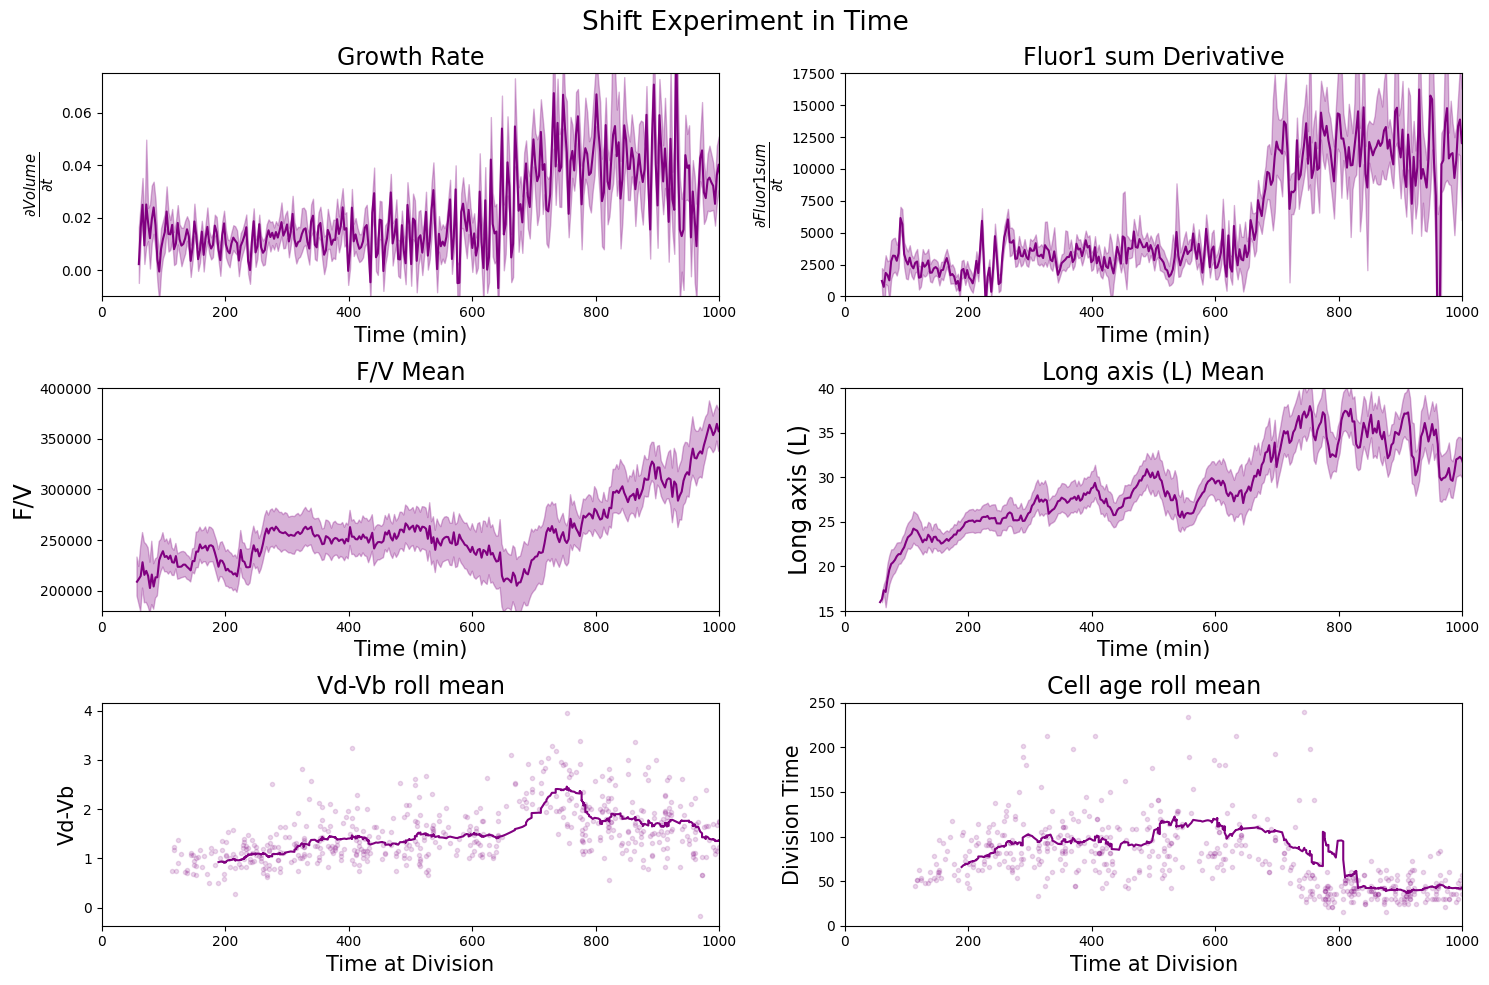

In [8]:
#@title Entire time plot
fig,ax = plt.subplots(3,2,figsize=(15,10))
color = 'purple'
bac.plot_derivative_mean(time_gr,mean_gr,ci_gr,column='Volume',derivative_column='Derivative',color = color,ax = ax[0][0])
ax[0][0].set_xlim(0,1000)
ax[0][0].set_ylim(-.01,.075)

bac.plot_derivative_mean(time_fluo,mean_fluo,ci_fluo,column='Fluor1 sum',derivative_column='Derivative',color = color,ax = ax[0][1])
ax[0][1].set_xlim(0,1000)
ax[0][1].set_ylim(0,17500)

bac.plot_column_mean(time_div,mean_div,ci_div,'Long axis (L)',color = color,ax = ax[1][1])
ax[1][1].set_xlim(0,1000)
ax[1][1].set_ylim(15,40)

bac.plot_column_mean(time_ratio,mean_ratio,ci_ratio,'F/V',color = color,ax = ax[1][0])
ax[1][0].set_xlim(0,1000)
ax[1][0].set_ylim(180000,400000)

ax[2][0].plot(df_2d_temp['Time Division'],df_2d_temp.value.rolling(30).mean(),color = color,)
ax[2][0].plot(df_2d_temp['Time Division'],df_2d_temp.value,'.',color = color,alpha = .15)
ax[2][0].set_title('Vd-Vb roll mean',fontsize = 17)
ax[2][0].set_xlabel('Time at Division',fontsize = 15)
ax[2][0].set_ylabel('Vd-Vb',fontsize = 15)
ax[2][0].set_xlim(0,1000)

ax[2][1].plot(df_2d_temp['Time Division'],df_2d_temp['Cell age'].rolling(30).mean(),color = color,)
ax[2][1].plot(df_2d_temp['Time Division'],df_2d_temp['Cell age'],'.',color = color, alpha = .15)
ax[2][1].set_title('Cell age roll mean',fontsize = 17)
ax[2][1].set_xlabel('Time at Division',fontsize = 15)
ax[2][1].set_ylabel('Division Time',fontsize = 15)
ax[2][1].set_xlim(0,1000)
ax[2][1].set_ylim(0,250)

fig.suptitle('Shift Experiment in Time',fontsize = 19)
plt.tight_layout()
plt.show()

fig.savefig('plots/experiment_time_1.png')

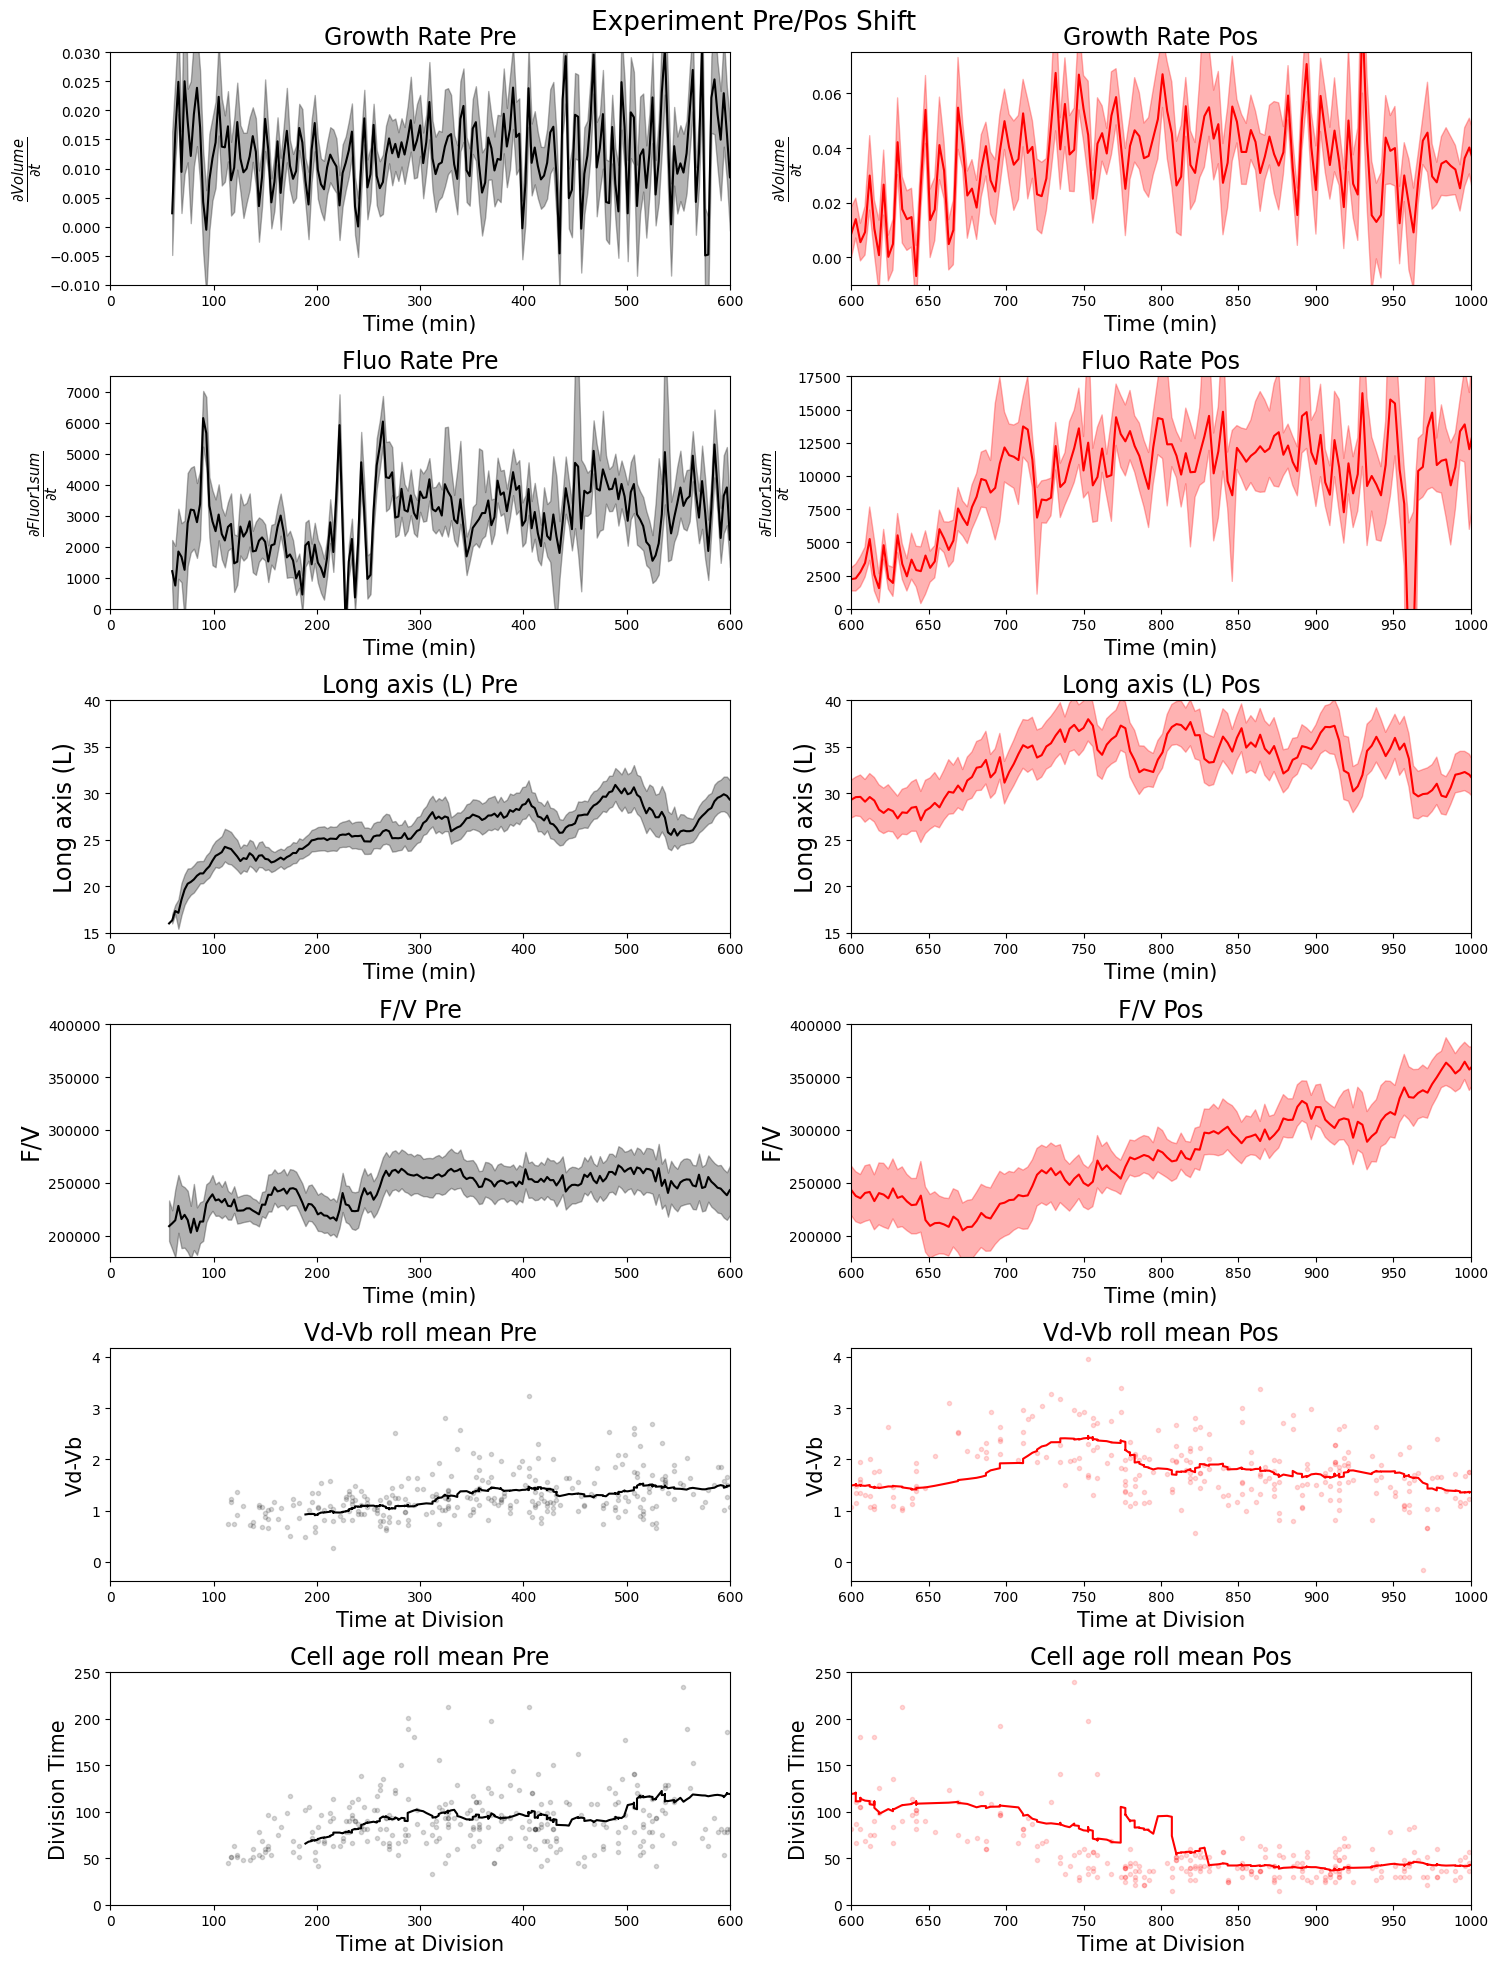

In [9]:
#@title Pre and pos shift plots
fig,ax = plt.subplots(6,2,figsize=(15,20))
pre_color = 'k'
pos_color = 'red'
bac.plot_derivative_mean(time_gr,mean_gr,ci_gr,column='Volume',derivative_column='Derivative',color = pre_color,ax = ax[0][0])
ax[0][0].set_title('Growth Rate Pre',fontsize = 17)
ax[0][0].set_xlim(0,600)
ax[0][0].set_ylim(-.01,.03)

bac.plot_derivative_mean(time_gr,mean_gr,ci_gr,column='Volume',derivative_column='Derivative',color = pos_color,ax = ax[0][1])
ax[0][1].set_title('Growth Rate Pos',fontsize = 17)
ax[0][1].set_xlim(600,1000)
ax[0][1].set_ylim(-.01,.075)

bac.plot_derivative_mean(time_fluo,mean_fluo,ci_fluo,column='Fluor1 sum',derivative_column='Derivative',color = pre_color,ax = ax[1][0])
ax[1][0].set_title('Fluo Rate Pre',fontsize = 17)
ax[1][0].set_xlim(0,600)
ax[1][0].set_ylim(0,7500)

bac.plot_derivative_mean(time_fluo,mean_fluo,ci_fluo,column='Fluor1 sum',derivative_column='Derivative',color = pos_color,ax = ax[1][1])
ax[1][1].set_title('Fluo Rate Pos',fontsize = 17)
ax[1][1].set_xlim(600,1000)
ax[1][1].set_ylim(0,17500)

bac.plot_column_mean(time_div,mean_div,ci_div,'Long axis (L)',color = pre_color,ax = ax[2][0])
ax[2][0].set_title('Long axis (L) Pre',fontsize = 17)
ax[2][0].set_xlim(0,600)
ax[2][0].set_ylim(15,40)

bac.plot_column_mean(time_div,mean_div,ci_div,'Long axis (L)',color = pos_color,ax = ax[2][1])
ax[2][1].set_title('Long axis (L) Pos',fontsize = 17)
ax[2][1].set_xlim(600,1000)
ax[2][1].set_ylim(15,40)

bac.plot_column_mean(time_ratio,mean_ratio,ci_ratio,'F/V',color = pre_color,ax = ax[3][0])
ax[3][0].set_title('F/V Pre',fontsize = 17)
ax[3][0].set_xlim(0,600)
ax[3][0].set_ylim(180000,400000)

bac.plot_column_mean(time_ratio,mean_ratio,ci_ratio,'F/V',color = pos_color,ax = ax[3][1])
ax[3][1].set_title('F/V Pos',fontsize = 17)
ax[3][1].set_xlim(600,1000)
ax[3][1].set_ylim(180000,400000)

ax[4][0].plot(df_2d_temp['Time Division'],df_2d_temp.value.rolling(30).mean(),color = pre_color,)
ax[4][0].plot(df_2d_temp['Time Division'],df_2d_temp.value,'.',color = pre_color,alpha =.15)
ax[4][0].set_title('Vd-Vb roll mean Pre',fontsize = 17)
ax[4][0].set_xlabel('Time at Division',fontsize = 15)
ax[4][0].set_ylabel('Vd-Vb',fontsize = 15)
ax[4][0].set_xlim(0,600)

ax[4][1].plot(df_2d_temp['Time Division'],df_2d_temp.value.rolling(30).mean(),color = pos_color)
ax[4][1].plot(df_2d_temp['Time Division'],df_2d_temp.value,'.',color = pos_color,alpha =.15)
ax[4][1].set_title('Vd-Vb roll mean Pos',fontsize = 17)
ax[4][1].set_xlabel('Time at Division',fontsize = 15)
ax[4][1].set_ylabel('Vd-Vb',fontsize = 15)
ax[4][1].set_xlim(600,1000)

ax[5][0].plot(df_2d_temp['Time Division'],df_2d_temp['Cell age'].rolling(30).mean(),color = pre_color)
ax[5][0].plot(df_2d_temp['Time Division'],df_2d_temp['Cell age'],'.',color = pre_color, alpha=.15)
ax[5][0].set_title('Cell age roll mean Pre',fontsize = 17)
ax[5][0].set_xlabel('Time at Division',fontsize = 15)
ax[5][0].set_ylabel('Division Time',fontsize = 15)
ax[5][0].set_xlim(0,600)
ax[5][0].set_ylim(0,250)

ax[5][1].plot(df_2d_temp['Time Division'],df_2d_temp['Cell age'].rolling(30).mean(),color = pos_color)
ax[5][1].plot(df_2d_temp['Time Division'],df_2d_temp['Cell age'],'.',color = pos_color, alpha=.15)
ax[5][1].set_title('Cell age roll mean Pos',fontsize = 17)
ax[5][1].set_xlabel('Time at Division',fontsize = 15)
ax[5][1].set_ylabel('Division Time',fontsize = 15)
ax[5][1].set_xlim(600,1000)
ax[5][1].set_ylim(0,250)

fig.suptitle('Experiment Pre/Pos Shift',fontsize = 19)
plt.tight_layout()
plt.show()

fig.savefig('plots/experiment_time_2.png')

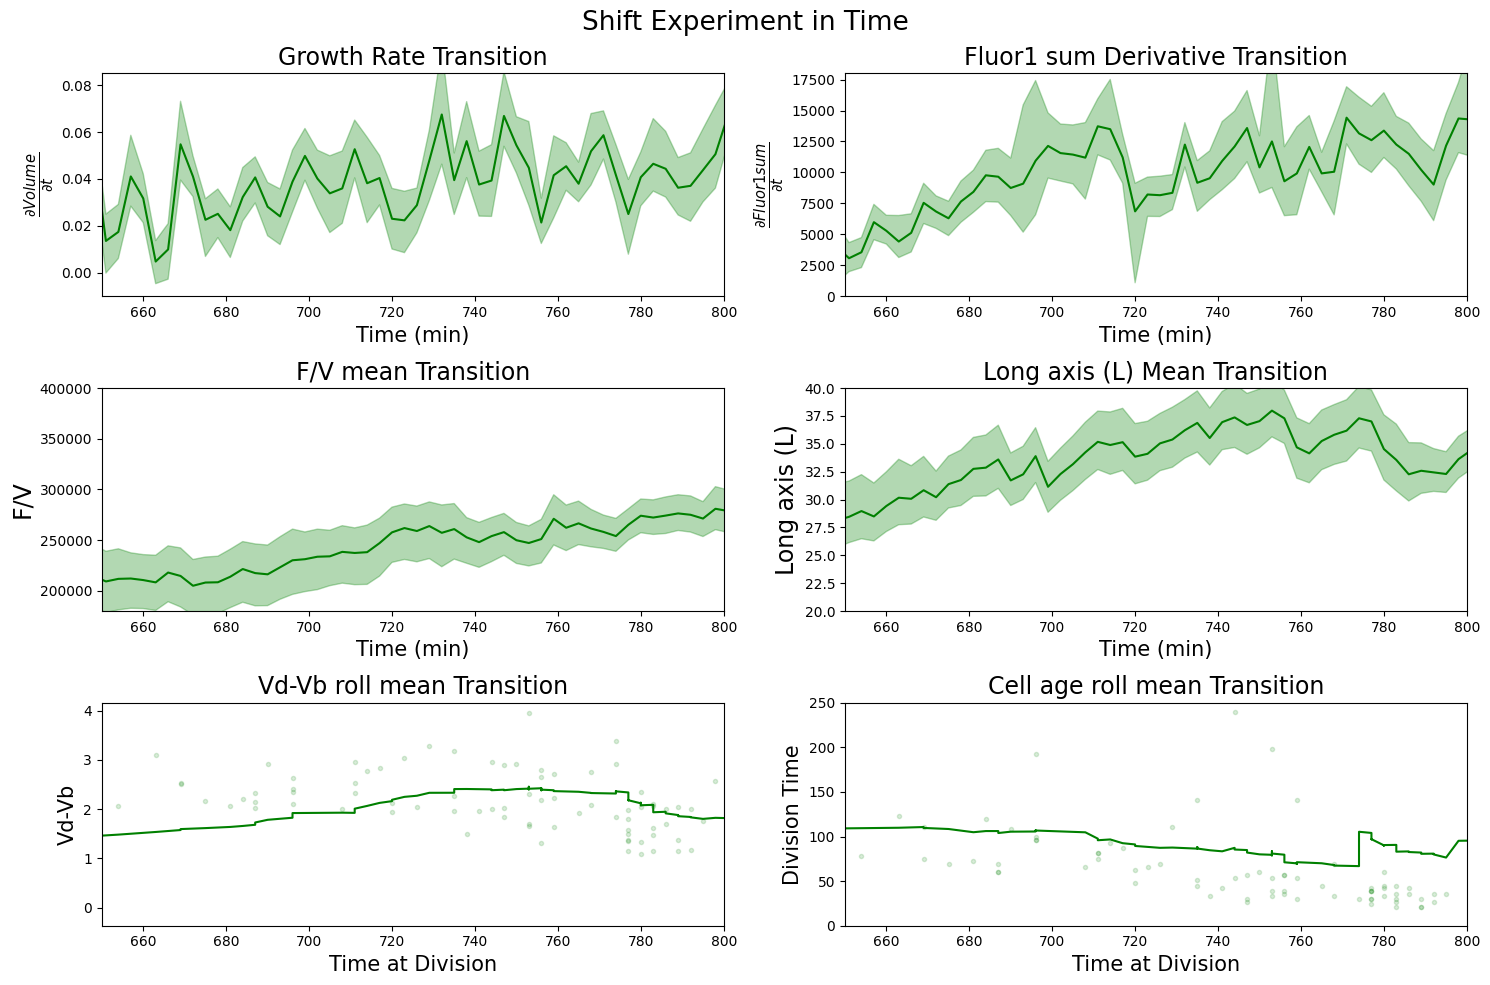

In [10]:
#@title Transiton plots
fig,ax = plt.subplots(3,2,figsize=(15,10))
bac.plot_derivative_mean(time_gr,mean_gr,ci_gr,column='Volume',derivative_column='Derivative',color = 'green',ax = ax[0][0])
ax[0][0].set_title('Growth Rate Transition',fontsize = 17)
ax[0][0].set_xlim(650,800)
ax[0][0].set_ylim(-.01,.085)

bac.plot_derivative_mean(time_fluo,mean_fluo,ci_fluo,column='Fluor1 sum',derivative_column='Derivative',color = 'green',ax = ax[0][1])
ax[0][1].set_title('Fluor1 sum Derivative Transition',fontsize = 17)
ax[0][1].set_xlim(650,800)
ax[0][1].set_ylim(0,18000)

bac.plot_column_mean(time_div,mean_div,ci_div,'Long axis (L)',color = 'green',ax = ax[1][1])
ax[1][1].set_title('Long axis (L) Mean Transition',fontsize = 17)
ax[1][1].set_xlim(650,800)
ax[1][1].set_ylim(20,40)

bac.plot_column_mean(time_ratio,mean_ratio,ci_ratio,'F/V',color = 'green',ax = ax[1][0])
ax[1][0].set_title('F/V mean Transition',fontsize = 17)
ax[1][0].set_xlim(650,800)
ax[1][0].set_ylim(180000,400000)

ax[2][0].plot(df_2d_temp['Time Division'],df_2d_temp.value.rolling(30).mean(),'green')
ax[2][0].plot(df_2d_temp['Time Division'],df_2d_temp.value,'.',color = 'green',alpha = .15)
ax[2][0].set_title('Vd-Vb roll mean Transition',fontsize = 17)
ax[2][0].set_xlabel('Time at Division',fontsize = 15)
ax[2][0].set_ylabel('Vd-Vb',fontsize = 15)
ax[2][0].set_xlim(650,800)

ax[2][1].plot(df_2d_temp['Time Division'],df_2d_temp['Cell age'].rolling(30).mean(),'green')
ax[2][1].plot(df_2d_temp['Time Division'],df_2d_temp['Cell age'],'.',color = 'green', alpha = .15)
ax[2][1].set_title('Cell age roll mean Transition',fontsize = 17)
ax[2][1].set_xlabel('Time at Division',fontsize = 15)
ax[2][1].set_ylabel('Division Time',fontsize = 15)
ax[2][1].set_xlim(650,800)
ax[2][1].set_ylim(0,250)

fig.suptitle('Shift Experiment in Time',fontsize = 19)
plt.tight_layout()
plt.show()

fig.savefig('plots/experiment_time_3.png')

## Cell Cycle Analysis

Cell ID filter pre and pos shift 

In [11]:
cells_pre = bac.cells_pre_shift(df3d,pre=600)
cells_pos = bac.cells_pos_shift(df3d,pos=800)

### Entire time plots

Volume derivative

In [12]:
bins_fluo_vol_norm,ci_fluo_vol_norm = bac.derivative_binning(fluo_df,
                                                             derivative_column='Derivative/V',
                                                             sort_by='Volume',
                                                             print_bins=True)

Bin:  1|Bin Min Value:    0|Bin Max Value:    0|Unique Points:     4
Bin:  2|Bin Min Value:    0|Bin Max Value:    1|Unique Points:  1781
Bin:  3|Bin Min Value:    1|Bin Max Value:    1|Unique Points:  5404
Bin:  4|Bin Min Value:    1|Bin Max Value:    2|Unique Points:  5087
Bin:  5|Bin Min Value:    2|Bin Max Value:    2|Unique Points:  3100
Bin:  6|Bin Min Value:    2|Bin Max Value:    3|Unique Points:  1625
Bin:  7|Bin Min Value:    3|Bin Max Value:    3|Unique Points:   711
Bin:  8|Bin Min Value:    3|Bin Max Value:    4|Unique Points:   221
Bin:  9|Bin Min Value:    4|Bin Max Value:    4|Unique Points:    48
Bin: 10|Bin Min Value:    4|Bin Max Value:    5|Unique Points:     5




In [13]:
bins_fluo_vol,ci_fluo_vol = bac.derivative_binning(fluo_df,
                                                   derivative_column='Derivative',
                                                   sort_by='Volume',
                                                   print_bins=False)

Fluorescence derivative

In [14]:
bins_fluo_cc_norm,ci_fluo_cc_norm = bac.derivative_binning(fluo_df,
                                                           derivative_column='Derivative/V',
                                                           sort_by='Cell Cycle',
                                                           print_bins=False)

In [15]:
bins_fluo_cc,ci_fluo_cc = bac.derivative_binning(fluo_df,
                                                 derivative_column='Derivative',
                                                 sort_by='Cell Cycle',
                                                 print_bins=False)

Fluo/Volume Ratio

In [16]:
bins_ratio_vol, ci_ratio_vol = bac.bin_column(df3d,column = 'F/V',sort_by = 'Volume',print_bins=False)
bins_ratio_cc, ci_ratio_cc = bac.bin_column(df3d,column = 'F/V',sort_by = 'Cell Cycle',print_bins=False)

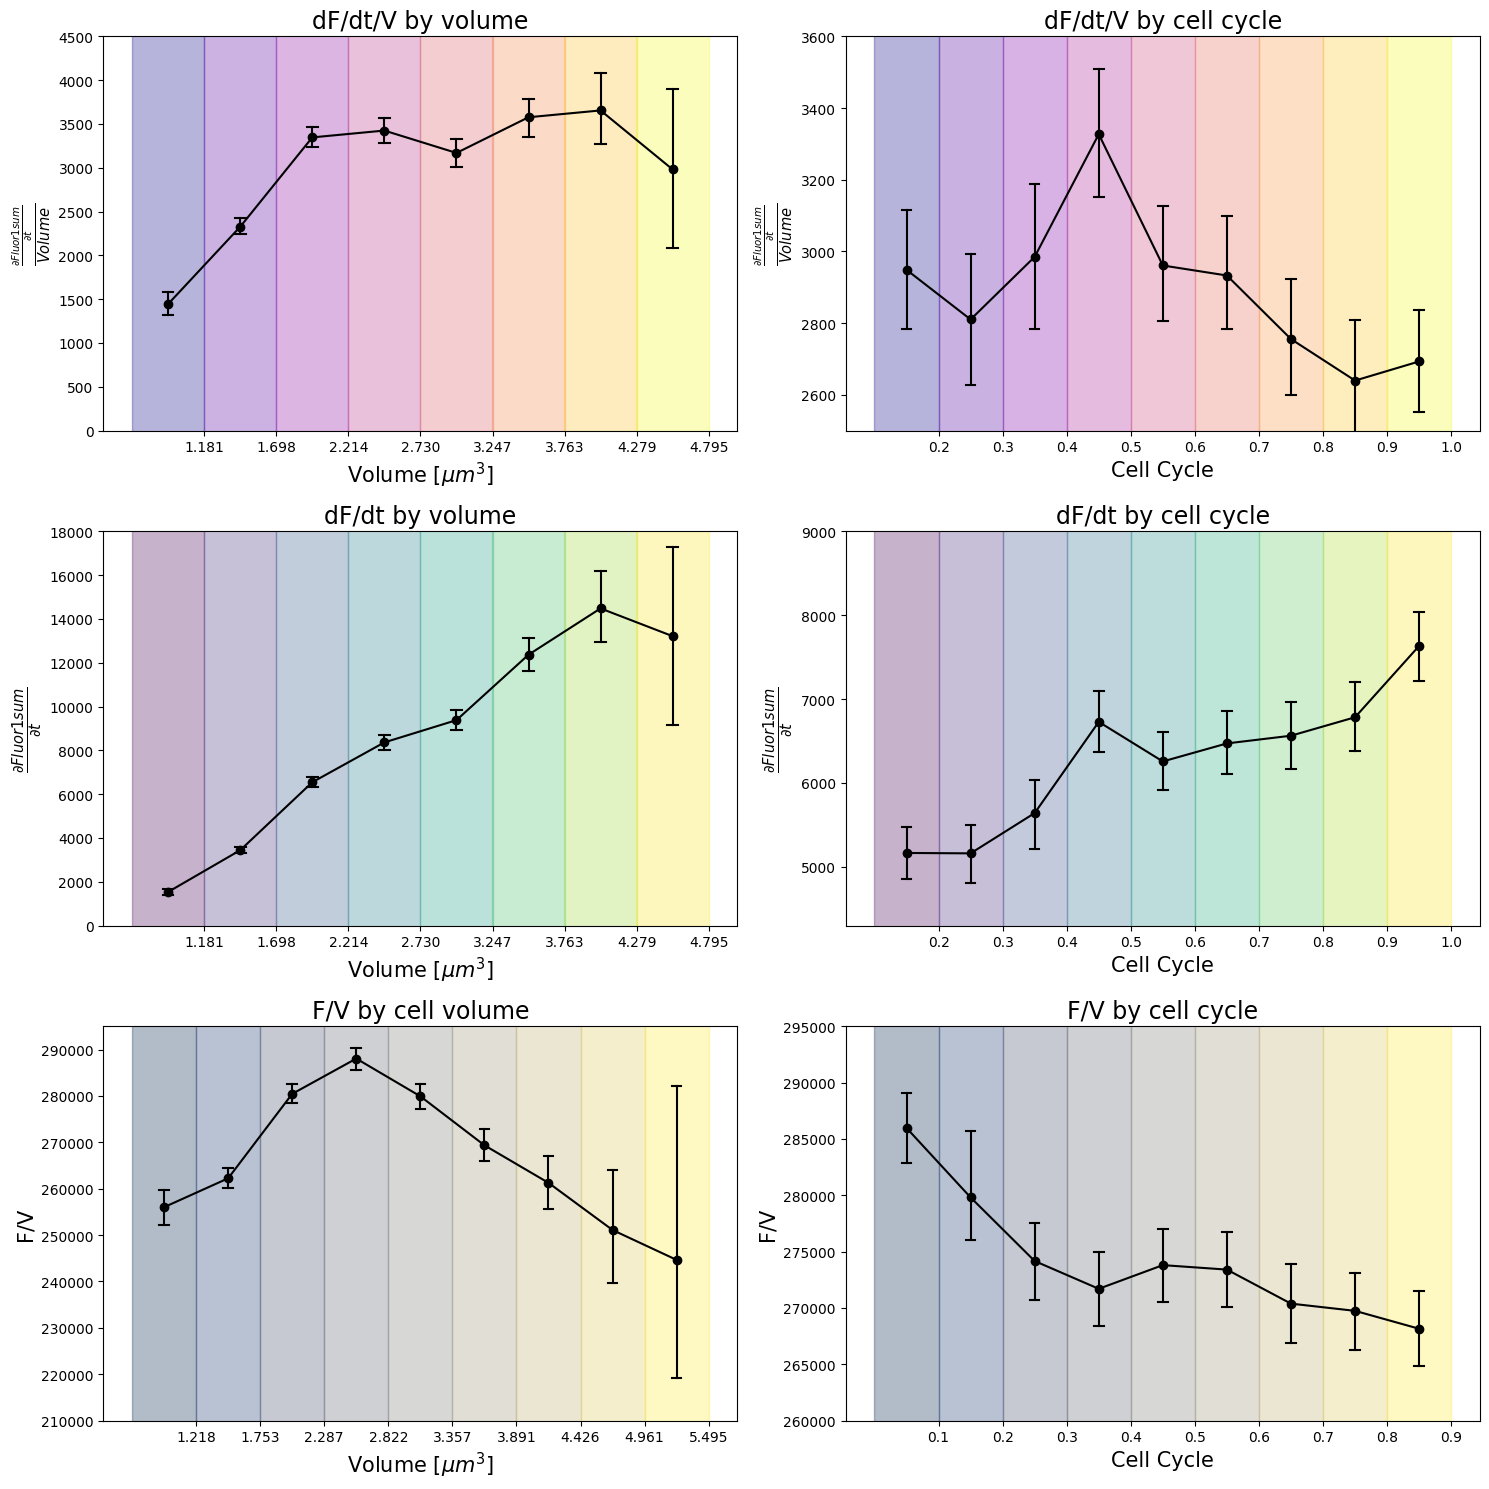

In [17]:
#@title Bin plots all time
fig,ax = plt.subplots(3,2,figsize=(15,15))
bac.plot_bins(bins_fluo_vol_norm[1:-1],ci_fluo_vol_norm[1:-1],column = 'Fluor1 sum',derivative_column='Derivative/V',sort_by='Volume', cmap ='plasma',ax=ax[0][0])
ax[0][0].set_title('dF/dt/V by volume', fontsize = 17)
ax[0][0].set_ylim(0,4500)

bac.plot_bins(bins_fluo_cc_norm[1:],ci_fluo_cc_norm[1:],column = 'Fluor1 sum',derivative_column='Derivative/V',sort_by='Cell Cycle', cmap ='plasma',ax=ax[0][1])
ax[0][1].set_title('dF/dt/V by cell cycle', fontsize = 17)
ax[0][1].set_ylim(2500,3600)

bac.plot_bins(bins_fluo_vol[1:-1],ci_fluo_vol[1:-1],column = 'Fluor1 sum',derivative_column='Derivative',sort_by='Volume', cmap ='viridis',ax=ax[1][0])
ax[1][0].set_title('dF/dt by volume', fontsize = 17)
ax[1][0].set_ylim(0,18000)

bac.plot_bins(bins_fluo_cc[1:],ci_fluo_cc[1:],column = 'Fluor1 sum',derivative_column='Derivative',sort_by='Cell Cycle', cmap ='viridis',ax=ax[1][1])
ax[1][1].set_title('dF/dt by cell cycle', fontsize = 17)
ax[1][1].set_ylim(4300,9000)

bac.plot_bins(bins_ratio_vol[1:],ci_ratio_vol[1:], cmap ='cividis',ax=ax[2][0])
ax[2][0].set_title('F/V by cell volume', fontsize = 17)
ax[2][0].set_xlabel(r'Volume [$\mu m^3$]')
ax[2][0].set_ylabel('F/V')
ax[2][0].set_ylim(210000,295000)

bac.plot_bins(bins_ratio_cc[:-1],ci_ratio_cc[:-1], cmap ='cividis',ax=ax[2][1])
ax[2][1].set_title('F/V by cell cycle', fontsize = 17)
ax[2][1].set_xlabel('Cell Cycle')
ax[2][1].set_ylabel('F/V')
ax[2][1].set_ylim(260000,295000)

plt.tight_layout()
plt.show()

fig.savefig('plots/cell_cycle_1.png')

### Pre and pos plots

In [18]:
bins_fluo_vol_norm,ci_fluo_vol_norm = bac.derivative_binning(fluo_df[fluo_df['Cell ID'].isin(cells_pre)],
                                                             derivative_column='Derivative/V',
                                                             sort_by='Volume',
                                                             print_bins=False)

bins_fluo_vol,ci_fluo_vol = bac.derivative_binning(fluo_df[fluo_df['Cell ID'].isin(cells_pre)],
                                                   derivative_column='Derivative',
                                                   sort_by='Volume',
                                                   print_bins=False)

bins_fluo_cc_norm,ci_fluo_cc_norm = bac.derivative_binning(fluo_df[fluo_df['Cell ID'].isin(cells_pre)],
                                                           derivative_column='Derivative/V',
                                                           sort_by='Cell Cycle',
                                                           print_bins=False)

bins_fluo_cc,ci_fluo_cc = bac.derivative_binning(fluo_df[fluo_df['Cell ID'].isin(cells_pre)],
                                                 derivative_column='Derivative',
                                                 sort_by='Cell Cycle',
                                                 print_bins=False)

bins_ratio_vol, ci_ratio_vol = bac.bin_column(df3d[df3d['Cell ID'].isin(cells_pre)],column = 'F/V',sort_by = 'Volume',print_bins=False)
bins_ratio_cc, ci_ratio_cc = bac.bin_column(df3d[df3d['Cell ID'].isin(cells_pre)],column = 'F/V',sort_by = 'Cell Cycle',print_bins=False)

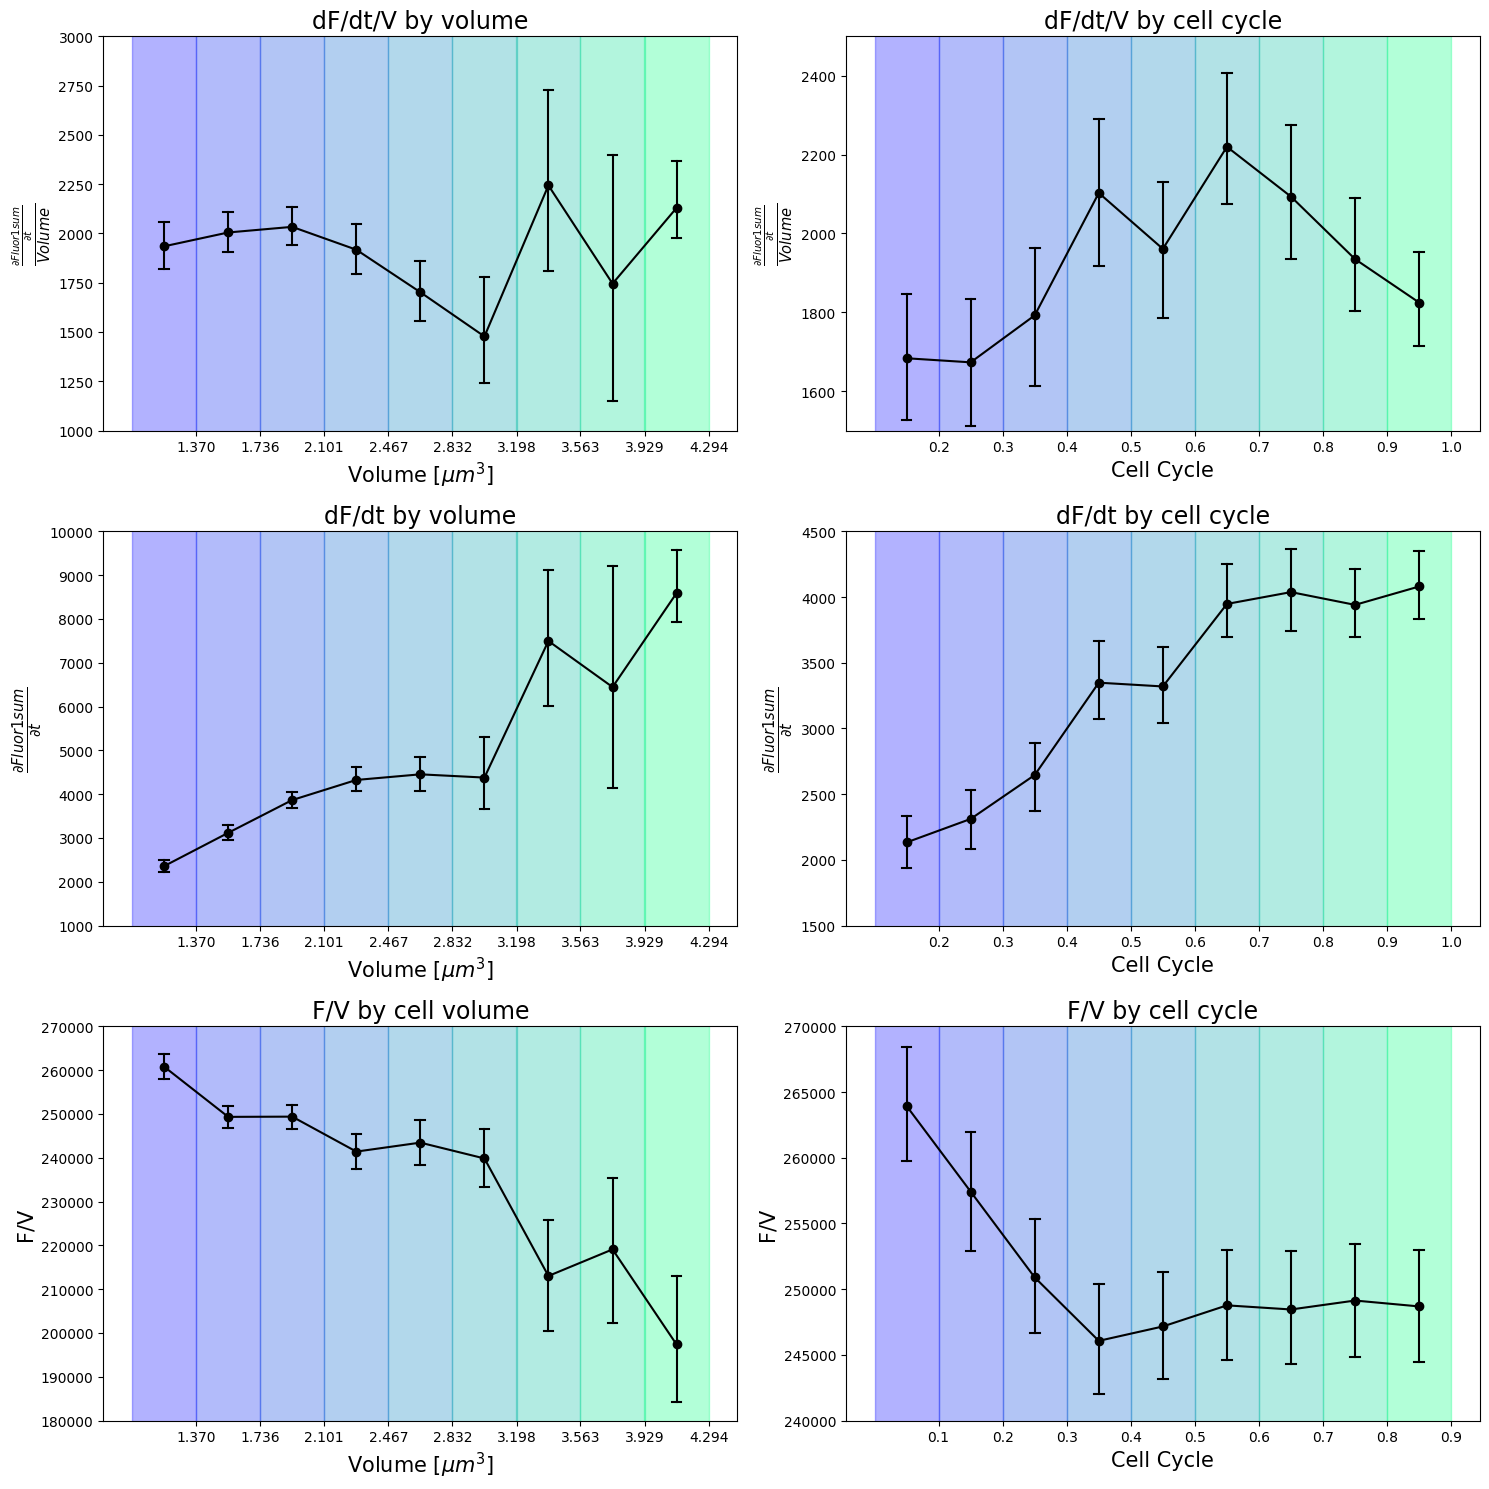

In [19]:
#@title Bin plots pre shift
fig,ax = plt.subplots(3,2,figsize=(15,15))
bac.plot_bins(bins_fluo_vol_norm[1:],ci_fluo_vol_norm[1:],column = 'Fluor1 sum',derivative_column='Derivative/V',sort_by='Volume', cmap ='winter',ax=ax[0][0])
ax[0][0].set_title('dF/dt/V by volume', fontsize = 17)
ax[0][0].set_ylim(1000,3000)

bac.plot_bins(bins_fluo_cc_norm[1:],ci_fluo_cc_norm[1:],column = 'Fluor1 sum',derivative_column='Derivative/V',sort_by='Cell Cycle', cmap ='winter',ax=ax[0][1])
ax[0][1].set_title('dF/dt/V by cell cycle', fontsize = 17)
ax[0][1].set_ylim(1500,2500)

bac.plot_bins(bins_fluo_vol[1:],ci_fluo_vol[1:],column = 'Fluor1 sum',derivative_column='Derivative',sort_by='Volume', cmap ='winter',ax=ax[1][0])
ax[1][0].set_title('dF/dt by volume', fontsize = 17)
ax[1][0].set_ylim(1000,10000)

bac.plot_bins(bins_fluo_cc[1:],ci_fluo_cc[1:],column = 'Fluor1 sum',derivative_column='Derivative',sort_by='Cell Cycle', cmap ='winter',ax=ax[1][1])
ax[1][1].set_title('dF/dt by cell cycle', fontsize = 17)
ax[1][1].set_ylim(1500,4500)

bac.plot_bins(bins_ratio_vol[1:],ci_ratio_vol[1:], cmap ='winter',ax=ax[2][0])
ax[2][0].set_title('F/V by cell volume', fontsize = 17)
ax[2][0].set_xlabel(r'Volume [$\mu m^3$]')
ax[2][0].set_ylabel('F/V')
ax[2][0].set_ylim(180000,270000)

bac.plot_bins(bins_ratio_cc[:-1],ci_ratio_cc[:-1], cmap ='winter',ax=ax[2][1])
ax[2][1].set_title('F/V by cell cycle', fontsize = 17)
ax[2][1].set_xlabel('Cell Cycle')
ax[2][1].set_ylabel('F/V')
ax[2][1].set_ylim(240000,270000)

plt.tight_layout()
plt.show()

fig.savefig('plots/cell_cycle_2.png')

In [20]:
bins_fluo_vol_norm,ci_fluo_vol_norm = bac.derivative_binning(fluo_df[fluo_df['Cell ID'].isin(cells_pos)],
                                                             derivative_column='Derivative/V',
                                                             sort_by='Volume',
                                                             print_bins=False)

bins_fluo_vol,ci_fluo_vol = bac.derivative_binning(fluo_df[fluo_df['Cell ID'].isin(cells_pos)],
                                                   derivative_column='Derivative',
                                                   sort_by='Volume',
                                                   print_bins=False)

bins_fluo_cc_norm,ci_fluo_cc_norm = bac.derivative_binning(fluo_df[fluo_df['Cell ID'].isin(cells_pos)],
                                                           derivative_column='Derivative/V',
                                                           sort_by='Cell Cycle',
                                                           print_bins=False)

bins_fluo_cc,ci_fluo_cc = bac.derivative_binning(fluo_df[fluo_df['Cell ID'].isin(cells_pos)],
                                                 derivative_column='Derivative',
                                                 sort_by='Cell Cycle',
                                                 print_bins=False)

bins_ratio_vol, ci_ratio_vol = bac.bin_column(df3d[df3d['Cell ID'].isin(cells_pos)],column = 'F/V',sort_by = 'Volume',print_bins=False)
bins_ratio_cc, ci_ratio_cc = bac.bin_column(df3d[df3d['Cell ID'].isin(cells_pos)],column = 'F/V',sort_by = 'Cell Cycle',print_bins=False)

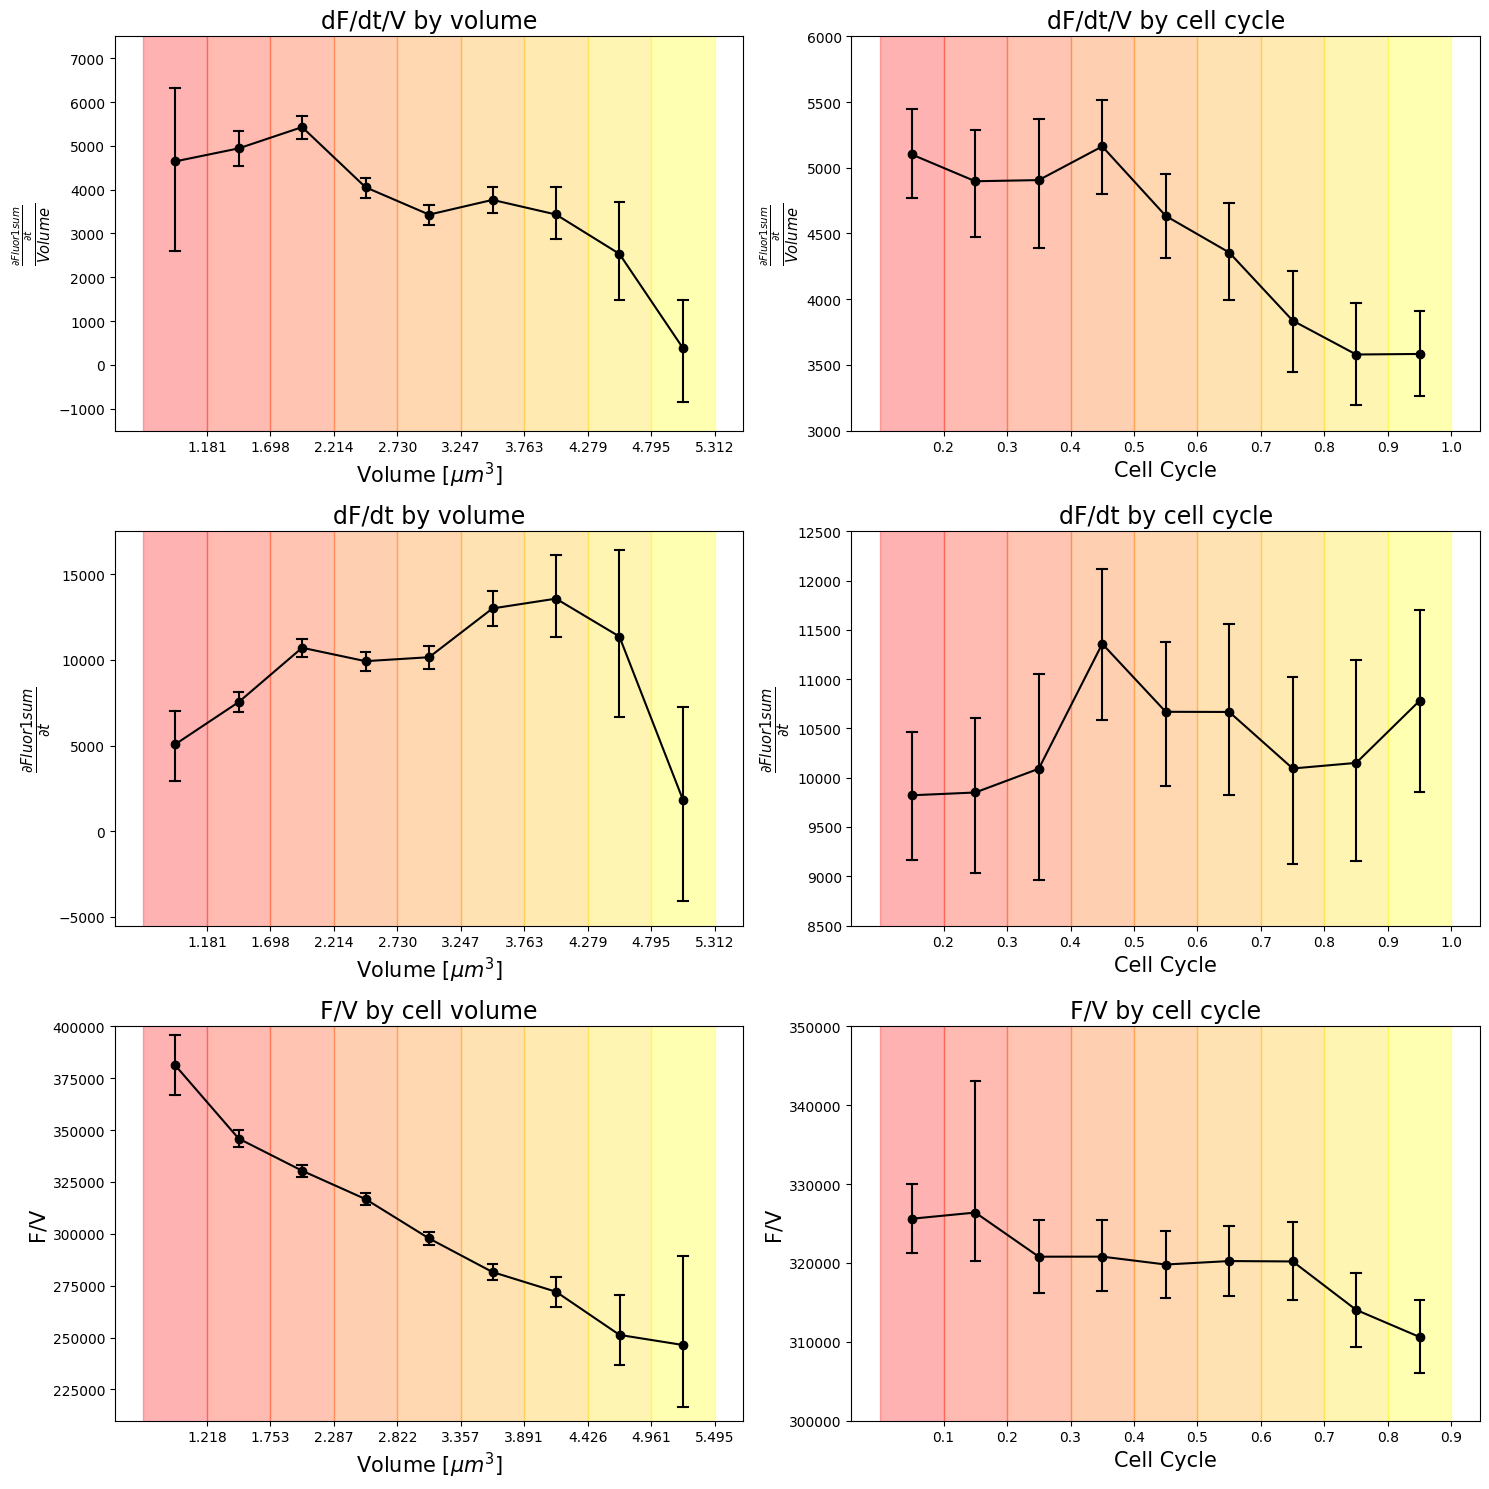

In [21]:
#@title Bin plots pos shift
fig,ax = plt.subplots(3,2,figsize=(15,15))
bac.plot_bins(bins_fluo_vol_norm[1:],ci_fluo_vol_norm[1:],column = 'Fluor1 sum',derivative_column='Derivative/V',sort_by='Volume', cmap ='autumn',ax=ax[0][0])
ax[0][0].set_title('dF/dt/V by volume', fontsize = 17)
ax[0][0].set_ylim(-1500,7500)

bac.plot_bins(bins_fluo_cc_norm[1:],ci_fluo_cc_norm[1:],column = 'Fluor1 sum',derivative_column='Derivative/V',sort_by='Cell Cycle', cmap ='autumn',ax=ax[0][1])
ax[0][1].set_title('dF/dt/V by cell cycle', fontsize = 17)
ax[0][1].set_ylim(3000,6000)

bac.plot_bins(bins_fluo_vol[1:],ci_fluo_vol[1:],column = 'Fluor1 sum',derivative_column='Derivative',sort_by='Volume', cmap ='autumn',ax=ax[1][0])
ax[1][0].set_title('dF/dt by volume', fontsize = 17)
ax[1][0].set_ylim(-5500,17500)

bac.plot_bins(bins_fluo_cc[1:],ci_fluo_cc[1:],column = 'Fluor1 sum',derivative_column='Derivative',sort_by='Cell Cycle', cmap ='autumn',ax=ax[1][1])
ax[1][1].set_title('dF/dt by cell cycle', fontsize = 17)
ax[1][1].set_ylim(8500,12500)

bac.plot_bins(bins_ratio_vol[1:],ci_ratio_vol[1:], cmap ='autumn',ax=ax[2][0])
ax[2][0].set_title('F/V by cell volume', fontsize = 17)
ax[2][0].set_xlabel(r'Volume [$\mu m^3$]')
ax[2][0].set_ylabel('F/V')
ax[2][0].set_ylim(210000,400000)

bac.plot_bins(bins_ratio_cc[:-1],ci_ratio_cc[:-1], cmap ='autumn',ax=ax[2][1])
ax[2][1].set_title('F/V by cell cycle', fontsize = 17)
ax[2][1].set_xlabel('Cell Cycle')
ax[2][1].set_ylabel('F/V')
ax[2][1].set_ylim(300000,350000)

plt.tight_layout()
plt.show()

fig.savefig('plots/cell_cycle_3.png')

## Lineage Analysis

Calculate all lineages in the dataset

In [22]:
reverse_lineages, large_lineages, large_nodes , all_nodes = bac.lineages(df2d)

Extract the longer lineages in dict and array

In [23]:
root_dict,lineage_array,len_dict = bac.longer_lineages(df3d,reverse_lineages)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Filter the lineages based on correlation. This func will remove from the array lineages that are two similiar based on correlation

In [24]:
filtered_lineage = bac.lineage_corr_filter(df3d,reverse_lineages)

Extract lineages start pre and pos the shift

In [25]:
lineage_pre = bac.lineages_pre_shift(df3d,reverse_lineages, shift = 700)
lineage_pos = bac.lineages_pos_shift(df3d,reverse_lineages, shift = 600)

/usr/local/lib/python3.10/dist-packages/bacteria/functions.py:2696: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(lineage_plot_labels,rotation=45)


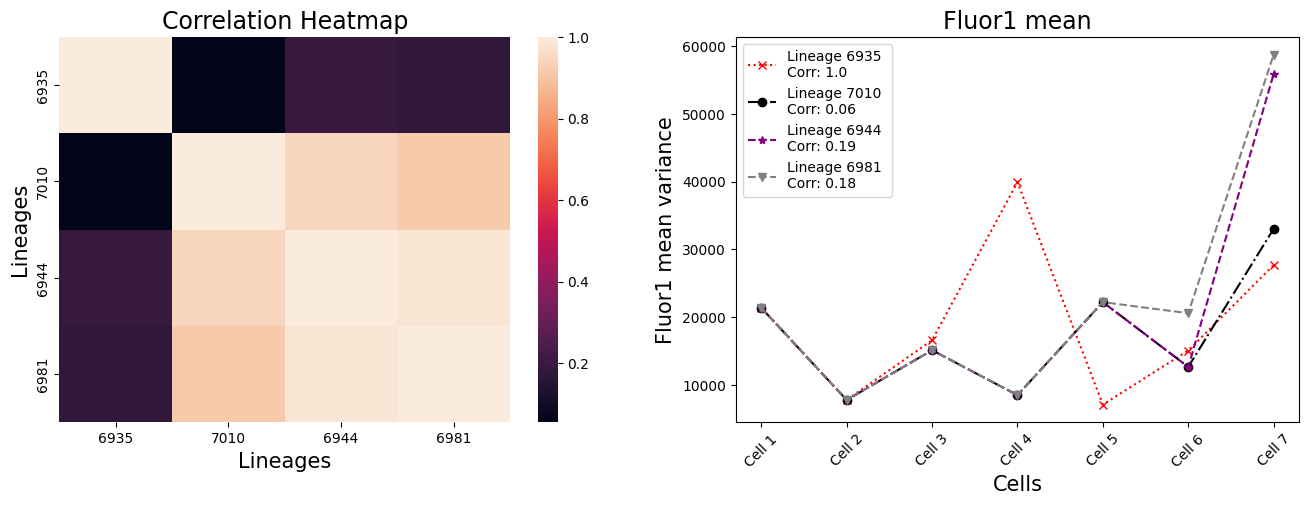

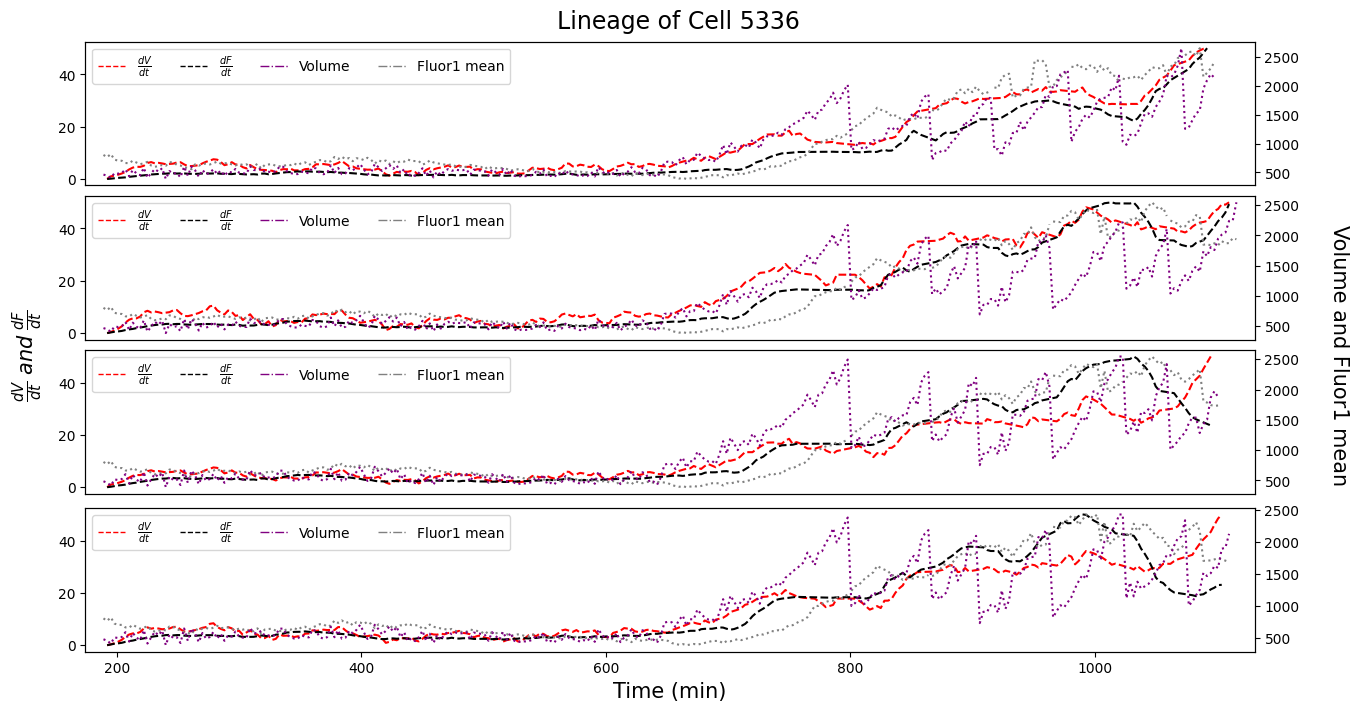

In [26]:
#@title Plot one cell mother lineage and the correlation between the nodes
bac.plot_corr_lineage(df3d,reverse_lineages,filtered_lineage[5][0]) # change the first square bracket

### The order is a paramater that will influence the amount of noise accepet to estimate the smoothed derivative

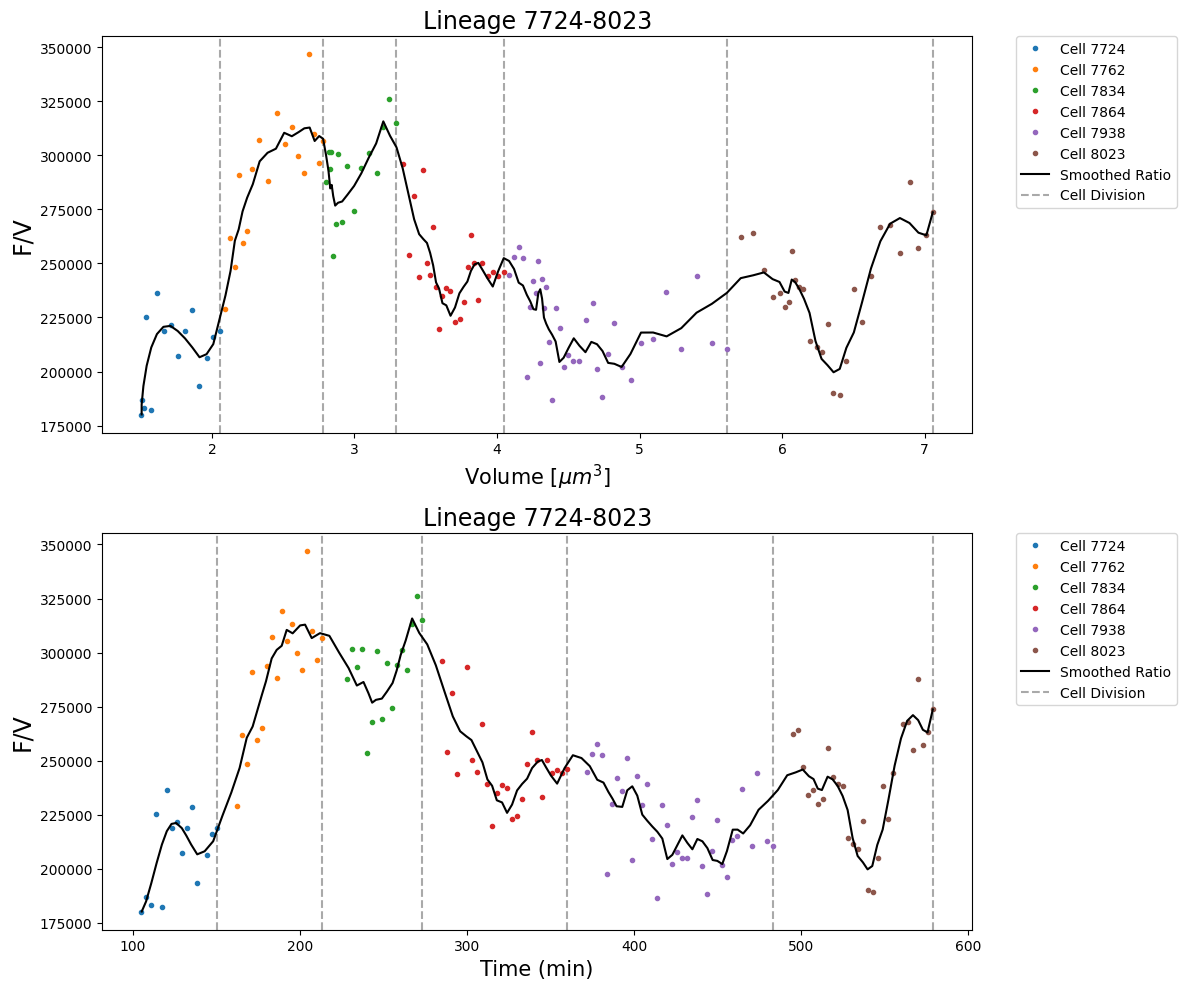

In [27]:
#@title Fluorescence concentration pre shift
fig,ax = plt.subplots(2,1, figsize = (12,10))

order = 5

df_lineage,peaks,order_dict = bac.lineage_derivative(df3d,filtered_lineage[9],order=order,column='Fluor1 sum')
bac.plot_lineage_ratio(df_lineage,x_axis='Smoothed Volume',ax=ax[0])

df_lineage,peaks,order_dict = bac.lineage_derivative(df3d,filtered_lineage[9],order=order,column='Fluor1 sum')
bac.plot_lineage_ratio(df_lineage,x_axis='Time (fps)',ax=ax[1])

plt.tight_layout()
plt.show()

fig.savefig('plots/lineage_2.png')

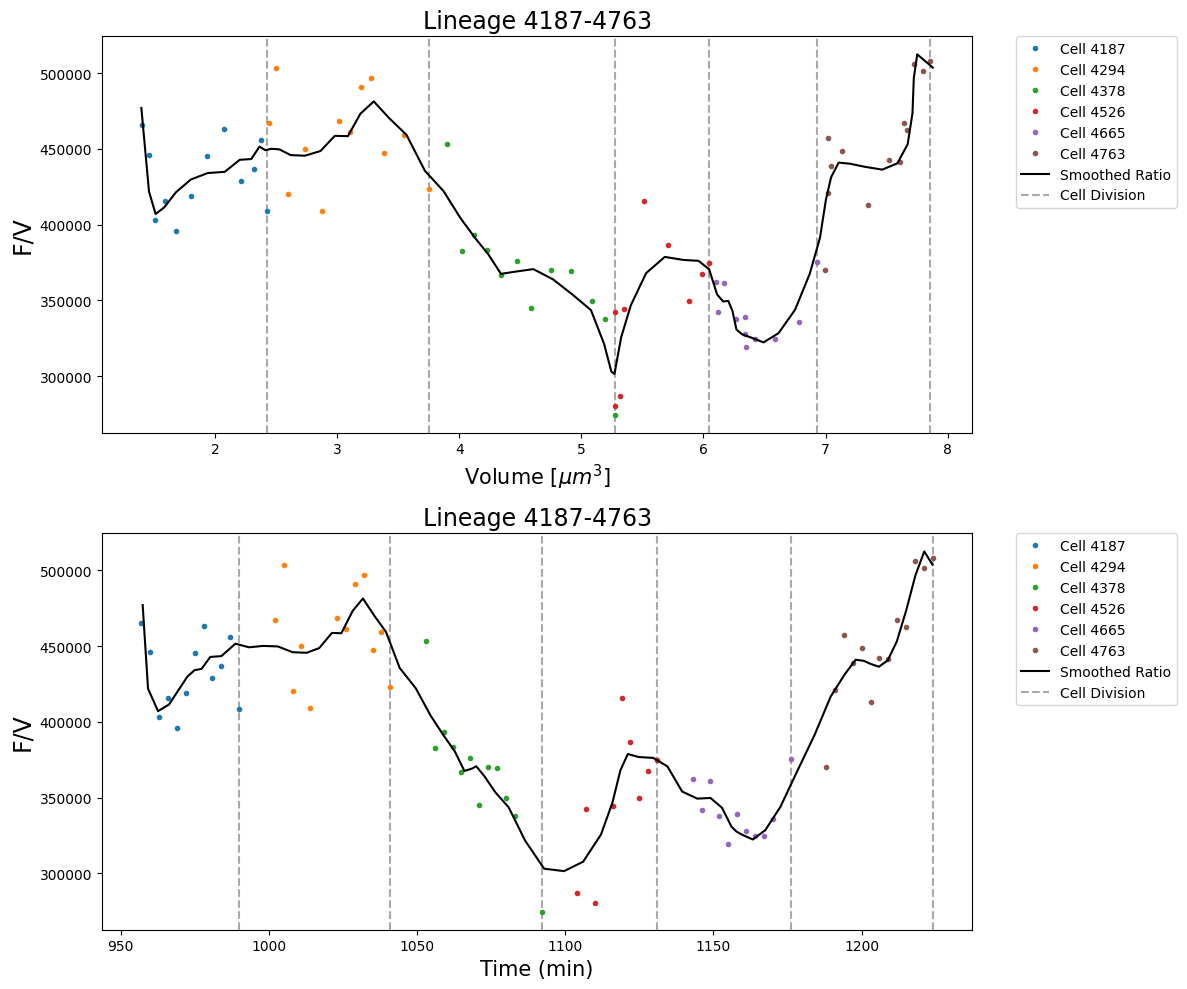

In [28]:
#@title Fluorescence concentration pos shift
fig,ax = plt.subplots(2,1, figsize = (12,10))

order = 5

df_lineage,peaks,order_dict = bac.lineage_derivative(df3d,filtered_lineage[2],order=order,column='Fluor1 sum')
bac.plot_lineage_ratio(df_lineage,x_axis='Smoothed Volume',ax=ax[0])

df_lineage,peaks,order_dict = bac.lineage_derivative(df3d,filtered_lineage[2],order=order,column='Fluor1 sum')
bac.plot_lineage_ratio(df_lineage,x_axis='Time (fps)',ax=ax[1])

plt.tight_layout()
plt.show()

fig.savefig('plots/lineage_3.png')

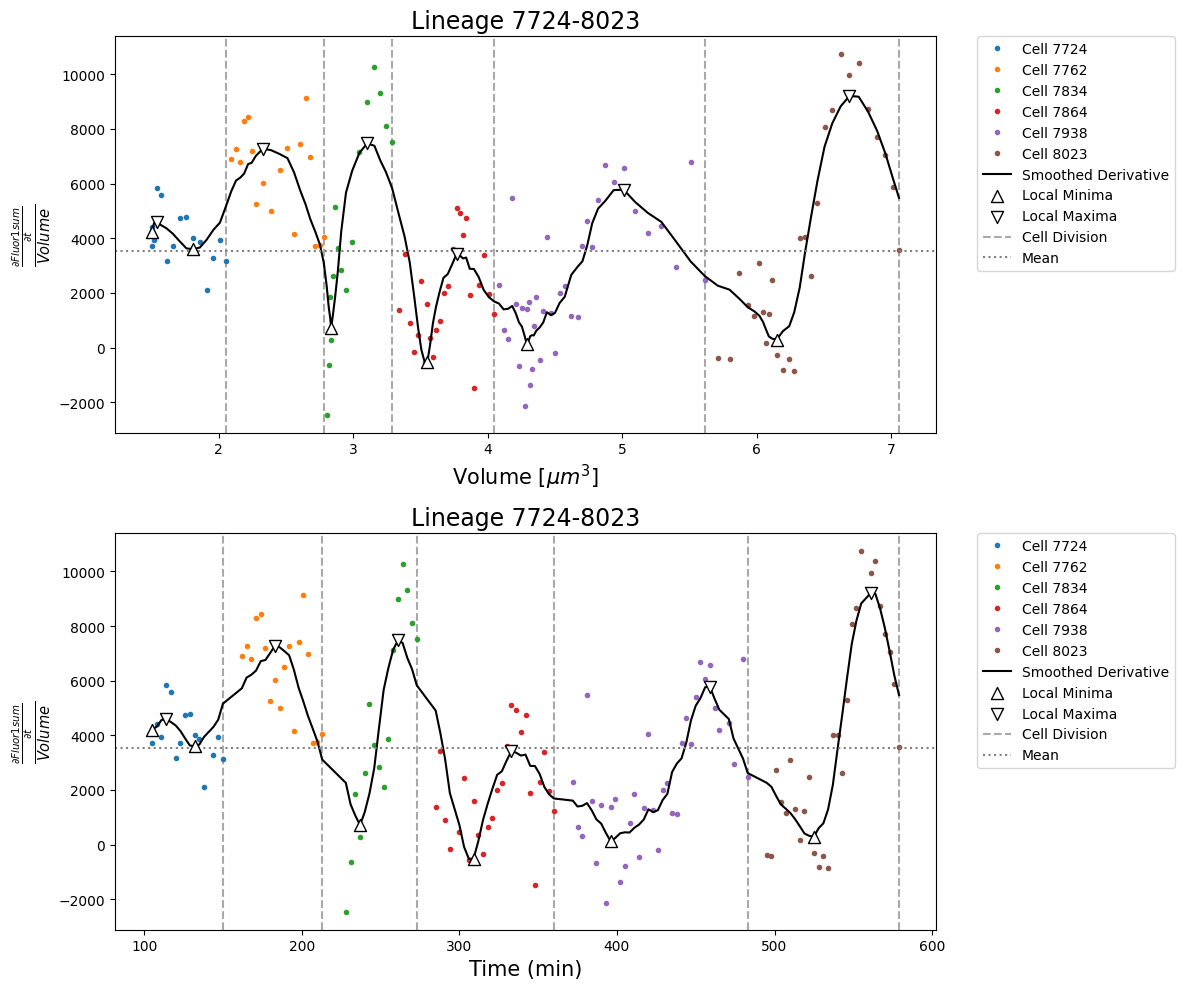

In [29]:
#@title Fluorescence rate pre shift

fig,ax = plt.subplots(2,1, figsize = (12,10))

order = 5

df_lineage,peaks,order_dict = bac.lineage_derivative(df3d,filtered_lineage[9],order=order,column='Fluor1 sum')
bac.plot_lineage_derivative(df_lineage,peaks,x_axis='Smoothed Volume',ax=ax[0])

df_lineage,peaks,order_dict = bac.lineage_derivative(df3d,filtered_lineage[9],order=order,column='Fluor1 sum')
bac.plot_lineage_derivative(df_lineage,peaks,x_axis='Time (fps)',ax=ax[1])

plt.tight_layout()
plt.show()

fig.savefig('plots/lineage_4.png')

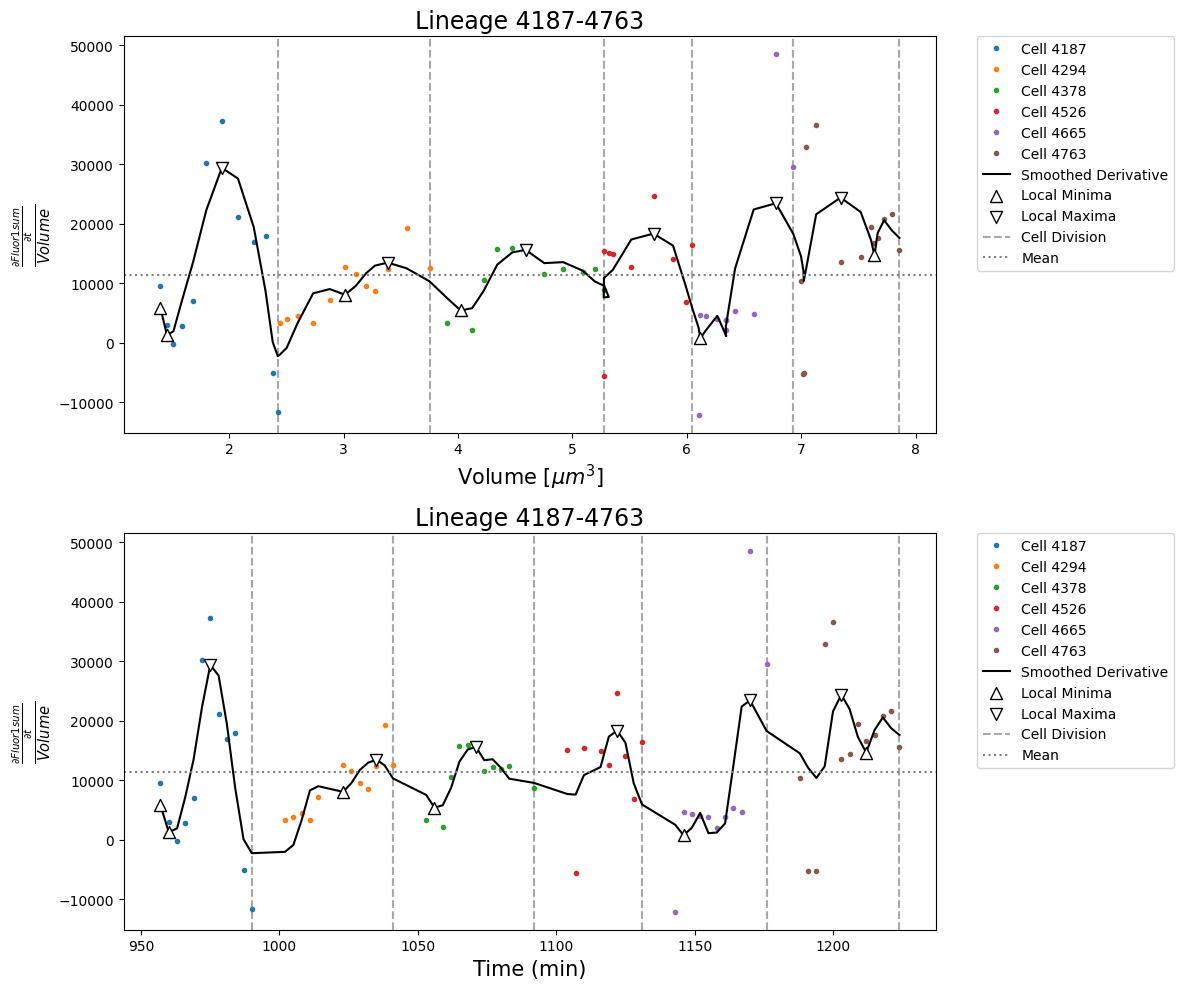

In [30]:
#@title Fluorescence rate pos shift

fig,ax = plt.subplots(2,1, figsize = (12,10))

order = 5

df_lineage,peaks,order_dict = bac.lineage_derivative(df3d,filtered_lineage[2],order=order,column='Fluor1 sum')
bac.plot_lineage_derivative(df_lineage,peaks,x_axis='Smoothed Volume',ax=ax[0])

df_lineage,peaks,order_dict = bac.lineage_derivative(df3d,filtered_lineage[2],order=order,column='Fluor1 sum')
bac.plot_lineage_derivative(df_lineage,peaks,x_axis='Time (fps)',ax=ax[1])

plt.tight_layout()
plt.show()

fig.savefig('plots/lineage_5.png')

## Minima Analysis

In [31]:
diff_dict = bac.diff_minima(df3d,df2d,pre = 600,pos = 800,order = 3, adjust = False)

100%|██████████| 924/924 [02:32<00:00,  6.07it/s]


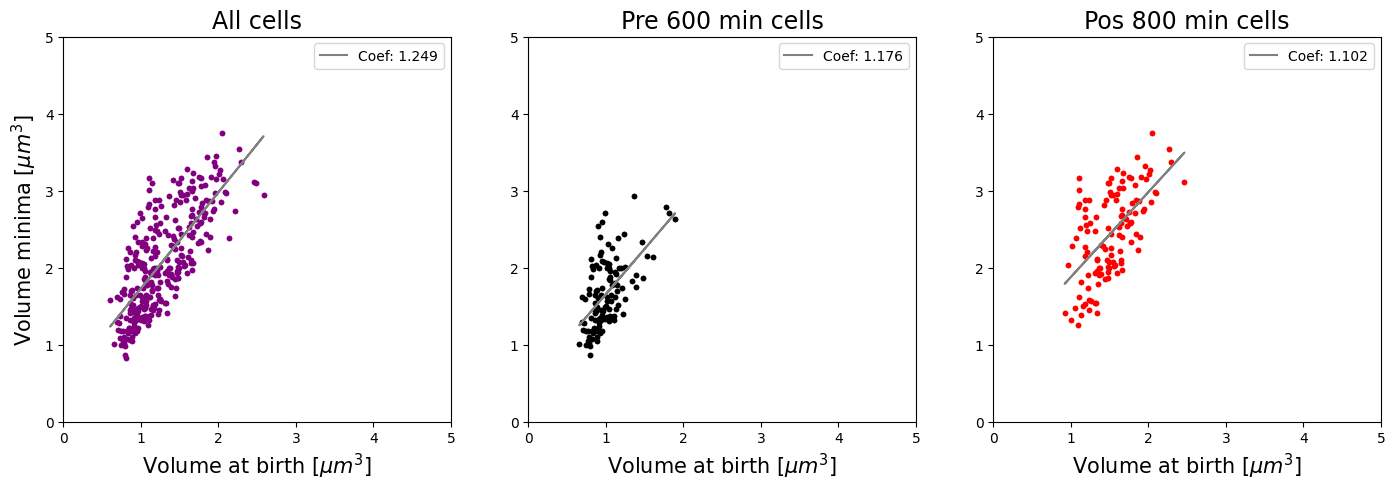

In [32]:
#@title Plot Minima Volume by Volume at birth
fig,ax = plt.subplots(1,3,figsize=(17,5))

bac.plot_distance_minima(diff_dict,'all',color='purple',ax=ax[0])
ax[0].set_ylim(0,5)
ax[0].set_xlim(0,5)
ax[0].legend(loc='upper right')
bac.plot_distance_minima(diff_dict,'pre',color = 'k',ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_ylim(0,5)
ax[1].set_xlim(0,5)
ax[1].legend(loc='upper right')
bac.plot_distance_minima(diff_dict,'pos',color = 'red',ax=ax[2])
ax[2].set_ylabel('')
ax[2].set_xlim(0,5)
ax[2].set_ylim(0,5)
ax[2].legend(loc='upper right')

plt.show()

fig.savefig('plots/minima_1.png')

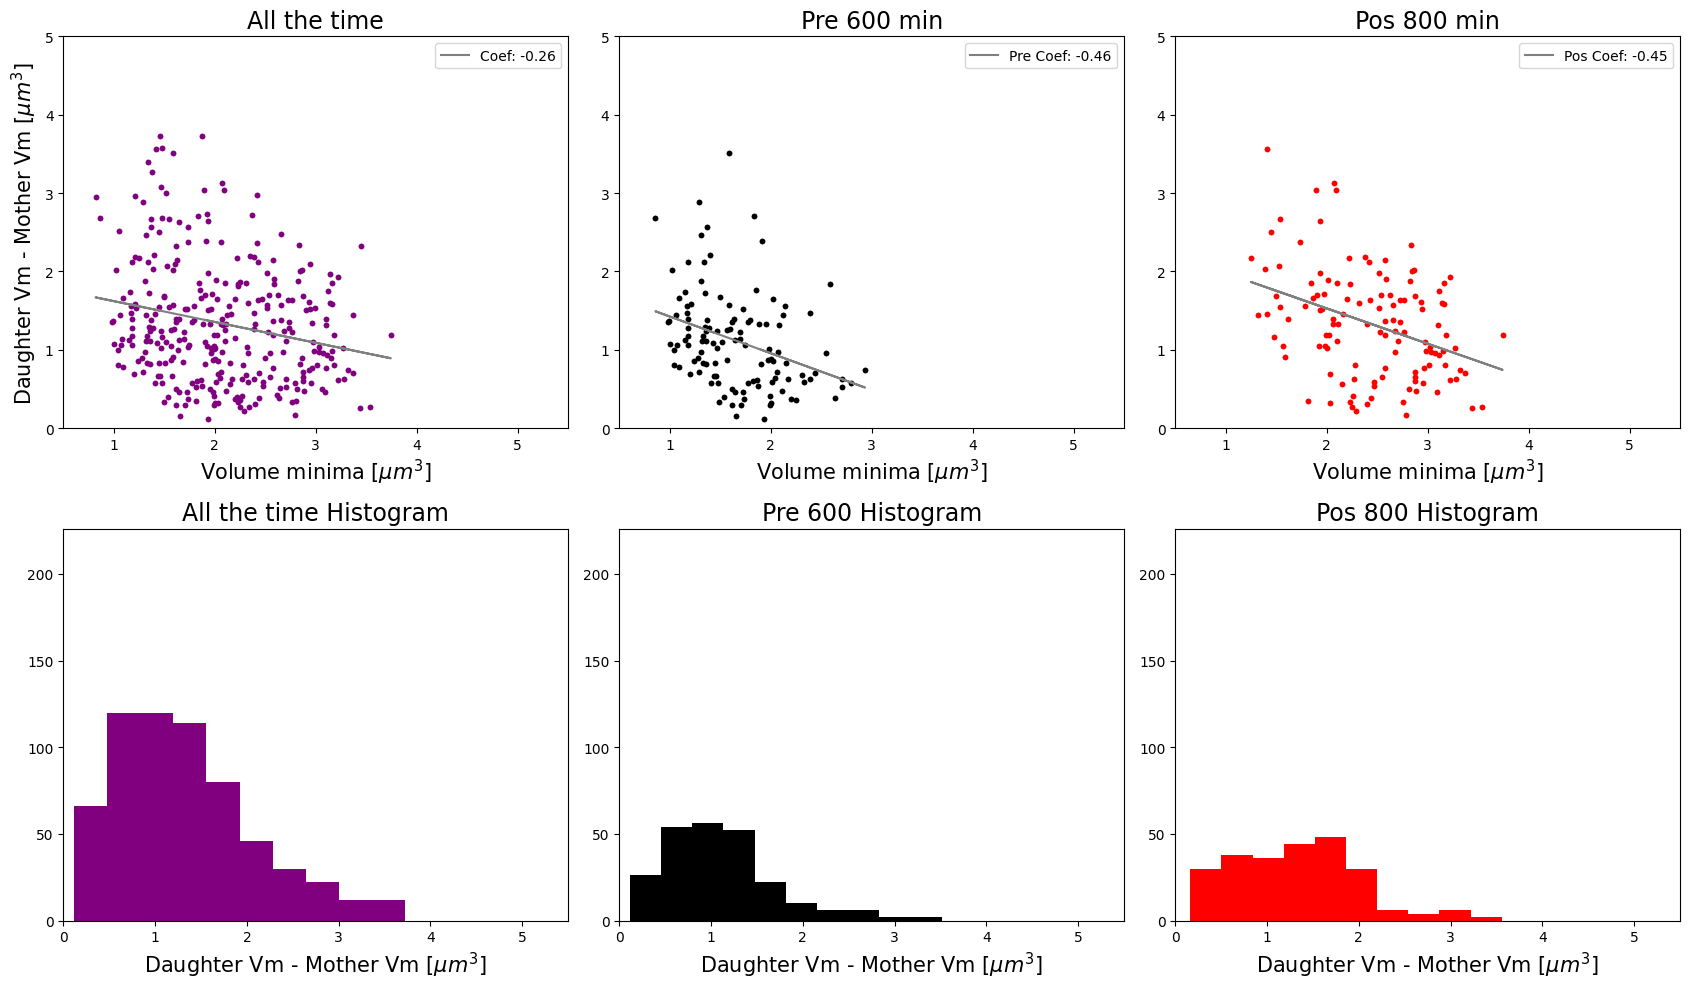

In [33]:
#@title Plot Daughther Minima Volume - Mother Minima Volume
bac.plot_diff_minima(diff_dict,color='purple')

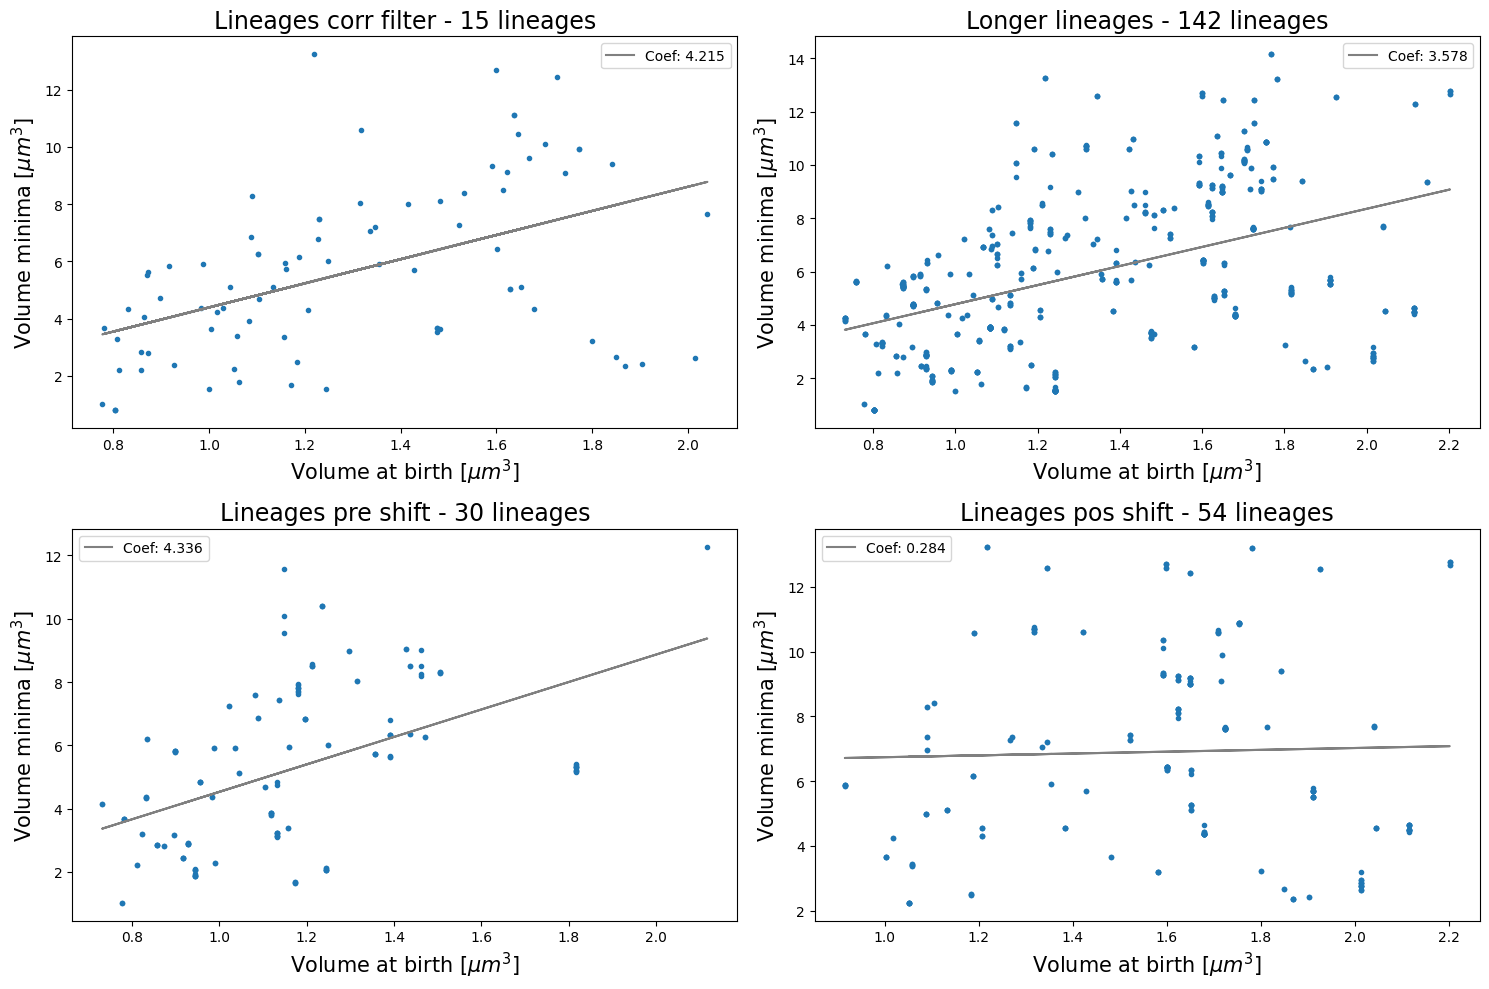

In [34]:
#@title Plot minima lineage by volume (order = 3)
fig,ax = plt.subplots(2,2,figsize=(15,10))

bac.plot_distance_minima_lineage(df3d,df2d,filtered_lineage,derivative_column = 'Derivative/V',order=3,ax=ax[0][0])
ax[0][0].set_title('Lineages corr filter - {} lineages'.format(len(filtered_lineage)),fontsize = 17)
bac.plot_distance_minima_lineage(df3d,df2d,lineage_array,derivative_column = 'Derivative/V',order=3,ax=ax[0][1])
ax[0][1].set_title('Longer lineages - {} lineages'.format(len(lineage_array)),fontsize = 17)
bac.plot_distance_minima_lineage(df3d,df2d,lineage_pre,derivative_column = 'Derivative/V',order=3,ax=ax[1][0])
ax[1][0].set_title('Lineages pre shift - {} lineages'.format(len(lineage_pre)),fontsize = 17)
bac.plot_distance_minima_lineage(df3d,df2d,lineage_pos,derivative_column = 'Derivative/V',order=3,ax=ax[1][1])
ax[1][1].set_title('Lineages pos shift - {} lineages'.format(len(lineage_pos)),fontsize = 17)

plt.tight_layout()
plt.show()

fig.savefig('plots/minima_3.png')